# Activity: Hypothesis testing with Python

## **Introduction**


As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting. 

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports** 


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [4]:
# Import libraries and packages.

### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

### YOUR CODE HERE ### 
data.head()


,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

**Question:** Why is it useful to perform exploratory data analysis before constructing a linear regression model?

[Write your response here. Double-click (or enter) to edit.]

## **Step 2: Data exploration** 


First, use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

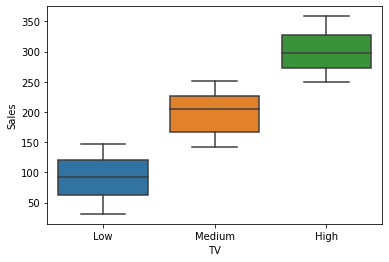

In [5]:
# Create a boxplot with TV and Sales.

### YOUR CODE HERE ### 
sns.boxplot(x=data['TV'], y = data['Sales'])

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a function in the `seaborn` library that creates a boxplot showing the distribution of a variable across multiple groups.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `boxplot()` function from `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `TV` as the `x` argument, `Sales` as the `y` argument, and `data` as the `data` argument.

</details>

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

[Yes the quantile range of each TV category are different very from each other.]

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

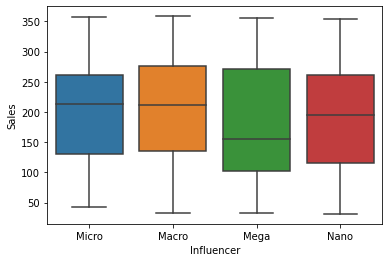

In [6]:
# Create a boxplot with Influencer and Sales.

### YOUR CODE HERE ### 
sns.boxplot(x = data['Influencer'], y = data['Sales'])


**Question:** Is there variation in `Sales` based off the `Influencer` size?

[There is no spread difference that is significant enough to say that Influncer affects sales.]

### Remove missing data

You may recall from prior labs that this dataset contains rows with missing values. To correct this, drop these rows. Then, confirm the data contains no missing values.

In [8]:
# Drop rows that contain missing data and update the DataFrame.

### YOUR CODE HERE ### 
data = data.dropna(axis=0)

# Confirm the data contains no missing values.

### YOUR CODE HERE ### 
data.isnull().sum()


TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Verify the data is updated properly after the rows containing missing data are dropped.

</details>

## **Step 3: Model building** 


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. Refer to your previous code for defining and fitting a linear regression model.

In [9]:
# Define the OLS formula.

### YOUR CODE HERE ### 
ols_formula = 'Sales ~ TV'

# Create an OLS model.

### YOUR CODE HERE ### 
OLS = ols(formula = ols_formula, data = data)

# Fit the model.

### YOUR CODE HERE ### 
model = OLS.fit()

# Save the results summary.

### YOUR CODE HERE ### 
model_summary = model.summary()

# Display the model results.

### YOUR CODE HERE ### 
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):          8.81e-256
Time:                        22:51:20   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      300.5296      2.417    124.360      0.000     295.783     305.276
TV[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
TV[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to code you've written to fit linear regression models.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function from `statsmodels.formula.api`, which creates a model from a formula and DataFrame, to create an OLS model.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `C()` around the variable name in the ols formula to indicate a variable is categorical.
    
Be sure the variable string names exactly match the column names in `data`.

</details>

**Question:** Which categorical variable did you choose for the model? Why?

[Based on the box plot there is a linearity ralationship between TV and Sales.]

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

**Question:** Is the linearity assumption met?

[Yes because the p value rejects the null hyphothesis.]

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

Next, verify that the normality assumption is upheld for the model.

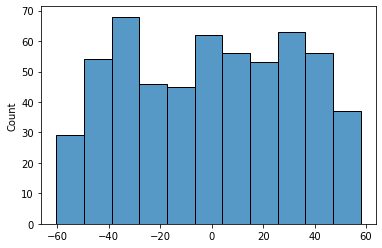

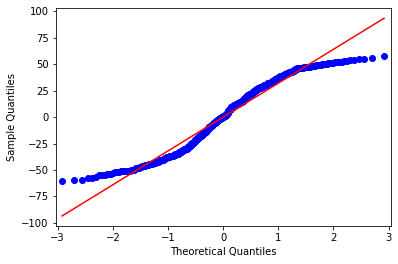

In [10]:
# Calculate the residuals.

### YOUR CODE HERE ### 
residuals = model.resid

# Create a histogram with the residuals. 

### YOUR CODE HERE ### 
sns.histplot(residuals)
plt.show()
# Create a QQ plot of the residuals.

### YOUR CODE HERE ### 
sm.qqplot(residuals, line='s')
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the QQ-plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?

[Yes the residuals are normaly distributed as shown by the histogram. Furthermore, the qqplot shows a straight line, which indicates that residuals are definitely normally distributed.]

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

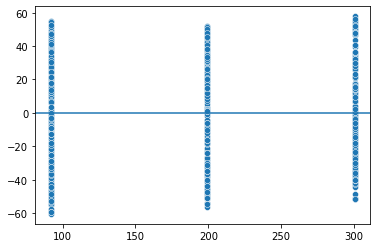

In [11]:
# Create a scatter plot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 
sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 
plt.axhline(0)
plt.show()


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from the fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance (homoscedasticity) assumption met?

[The variance looks like its evenly spread even though the clustering is affectted by TV type each cluster resembles each others variance.]

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [12]:
# Display the model results summary.

### YOUR CODE HERE ### 
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):          8.81e-256
Time:                        22:51:20   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      300.5296      2.417    124.360      0.000     295.783     305.276
TV[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
TV[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?

[87.4% of the variance in Sales is explained by TV variable.]

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

[The High TV category is the refrence point chosen by the model. When]

**Question:** Do you think your model could be improved? Why or why not? How?

[Adding more categories that dissects the TV categories more might be able to increase the accuracy of the model.]

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [13]:
# Create an one-way ANOVA table for the fit model.

### YOUR CODE HERE ### 
sm.stats.anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
TV,2.0,4.052692e+06,2.026346e+06,1971.455737,8.805550e-256
Residual,566.0,5.817589e+05,1.027843e+03,NaN,NaN


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a one-way ANOVA test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in `statsmodels.api` (i.e. `sm`) that peforms an ANOVA test for a fit linear model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `anova_lm()` function from `sm.stats`. Specify the type of ANOVA test (for example, one-way or two-way), using the `typ` parameter.
   

</details>

**Question:** What are the null and alternative hypotheses for the ANOVA test?

[Write your response here. Double-click (or enter) to edit.]

**Question:** What is your conclusion from the one-way ANOVA test?

[Write your response here. Double-click (or enter) to edit.]

**Question:** What did the ANOVA test tell you?

[Write your response here. Double-click (or enter) to edit.]

### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [16]:
# Perform the Tukey's HSD post hoc test.

### YOUR CODE HERE ### 
tukey_oneway = pairwise_tukeyhsd(endog = data['Sales'], groups = data['TV'])

tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.001,-216.637,-200.9896,True
High,Medium,-101.5061,0.001,-109.3204,-93.6918,True
Low,Medium,107.3072,0.001,99.7063,114.908,True


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a Tukey's HSD post hoc test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pairwise_tukeyhsd()` function from `statsmodels.stats.multicomp`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `endog` argument in `pairwise_tukeyhsd` indicates which variable is being compared across groups (i.e., `Sales`). The `groups` argument in `pairwise_tukeyhsd` tells the function which variable holds the group you’re interested in reviewing.

</details>

**Question:** What is your interpretation of the Tukey HSD test?

[Write your response here. Double-click (or enter) to edit.]

**Question:** What did the post hoc tell you?**

[Write your response here. Double-click (or enter) to edit.]

## **Considerations**

**What are some key takeaways that you learned during this lab?**

[Write your response here. Double-click (or enter) to edit.]


**What summary would you provide to stakeholders? Consider the statistical significance of key relationships and differences in distribution.**

High TV promotion budgets result in significantly more sales than both medium and low TV promotion budgets. Medium TV promotion budgets result in significantly more sales than low TV promotion budgets.

Specifically, following are estimates for the average difference between each pair of TV promotions:

Estimated average difference between High and Low TV promotions: $209.87 million (with 95% confidence that the exact value for this average difference is between 201.89 and 217.84 million dollars).
Estimated average difference between High and Medium TV promotions: $105.50 million (with 95% confidence that the exact value for this average difference is between 97.56 and 113.43 million dollars).
Estimated average difference between Medium and Low TV promotions: $104.37 million (with 95% confidence that the exact value for this average difference is between 96.83 and 111.92 million dollars).
The linear regression model estimating Sales from TV had an R-squared of $0.871, making it a fairly accurate estimator. The model showed a statistically significant relationship between the TV promotion budget and Sales. The model estimated the following relationships:

Using a high TV promotion budget instead of a medium TV promotion budget increased sales by 105.4952 million dollars (95% CI - 98.859, 112.131 million dollars).

Using a high TV promotion budget instead of a low TV promotion budget increased sales by 209.8691 million dollars (95% CI - 203.203 million, 216.535 million dollars).

The results of the one-way ANOVA test indicate that the null hypothesis that there is no difference in Sales based on the TV promotion budget can be rejected. Through the ANOVA post hoc test, a significant difference between all pairs of TV promotions was found.

The difference in the distribution of sales across TV promotions was determined significant by both a one-way ANOVA test and a Tukey’s HSD test.


#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.